# Bengaluru_House_Data 

## Preprocessing

In [136]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [137]:
df=pd.read_csv("D:\\LAUNCH MY OWN DATA SCIENCE PROJECTS\\Bengaluru_House_Data.csv")

In [138]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [139]:
df.shape

(13320, 9)

In [140]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [141]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [142]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [143]:
location_grps = df1.groupby('location')['location'].count().sort_values(ascending = False)
location_grps

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [144]:
len(location_grps[location_grps<=10])

1064

In [145]:
location_grps_lessthan_10 = location_grps[location_grps<=10]
location_grps_lessthan_10

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

In [146]:
df1.location = df1.location.apply(lambda x: 'other' if x in location_grps_lessthan_10 else x)

In [147]:
len(df1.location.unique())

243

In [148]:
df1.location.value_counts()

other                 2900
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Kodigehalli             11
Banjara Layout          11
Pattandur Agrahara      11
LB Shastri Nagar        11
Thyagaraja Nagar        11
Name: location, Length: 242, dtype: int64

In [149]:
df1=df1.replace({'size':'[A-Za-z]'},'',regex=True)
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,other,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [150]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [151]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [152]:
df1[~df1['total_sqft'].apply(is_float)].head(5)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
56,Devanahalli,4,3010 - 3410,NaN,192.000
81,Hennur Road,4,2957 - 3450,NaN,224.500
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005


In [153]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [154]:
df2=df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [155]:
df2.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
dtype: object

In [156]:

df2["size"] = pd.to_numeric(df2["size"])

In [157]:
df2.isnull().sum()

location       1
size          16
total_sqft    46
bath          73
price          0
dtype: int64

In [158]:
df2.describe()

,size,total_sqft,bath,price
count,13304.000000,13274.000000,13247.000000,13320.000000
mean,2.803743,1559.626694,2.692610,112.565627
std,1.294974,1238.405258,1.341458,148.971674
min,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1276.000000,2.000000,72.000000
75%,3.000000,1680.000000,3.000000,120.000000
max,43.000000,52272.000000,40.000000,3600.000000


In [159]:
cols = ['price','total_sqft','size','bath'] 

Q1 = df2[cols].quantile(0.25)
Q3 = df2[cols].quantile(0.75)
IQR = Q3 - Q1

df2 = df2[~((df2[cols] < (Q1 - 1.5 * IQR)) |(df2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [160]:
df2.shape

(11112, 5)

In [161]:
df2.isnull().sum()

location       1
size          12
total_sqft    34
bath          45
price          0
dtype: int64

In [162]:
new_df=df2.dropna()
new_df.shape


(11032, 5)

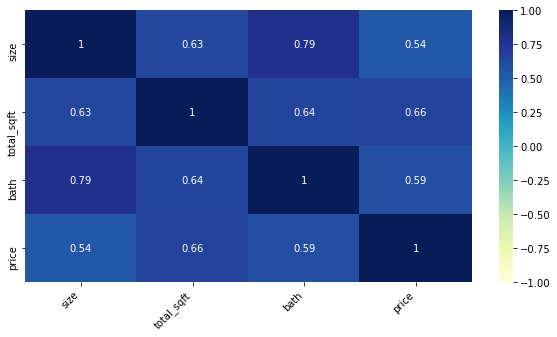

In [163]:
import seaborn as sns
corr = new_df.corr()
plt.figure(figsize=(10,5))
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [164]:
df_new_1= new_df.drop(['size'], axis = 'columns')

In [165]:
dummies = pd.get_dummies(df_new_1.location)
dummies.head(3)
df_new_2= pd.concat([df_new_1,dummies.drop('other',axis='columns')],axis='columns')
df_new_3 = df_new_2.drop('location',axis='columns')
df_new_3.head(3)

,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
X = df_new_3.drop(['price'],axis='columns')
y = df_new_3.price

## Build the Models

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.2,random_state=10)

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
LR = LinearRegression()
LR.fit(X_train,y_train)
predictions_LR=LR.predict(X_test)
print("LR Accuracy Score : ",LR.score(X_test, y_test)*100)


LR Accuracy Score :  57.992267546566836


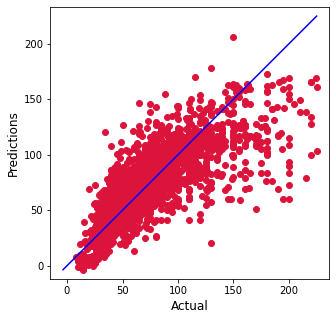

In [179]:

plt.figure(figsize=(5,5))
plt.scatter(y_test, predictions_LR, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max( predictions_LR), max(y_test))
p2 = min(min( predictions_LR), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.axis('equal')
plt.show()

In [176]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(X_test,y_test)
predictions_RF=RF.predict(X_test)
print("RF Accuracy Score : ",RF.score(X_test, y_test)*100)

RF Accuracy Score :  89.84054154151605


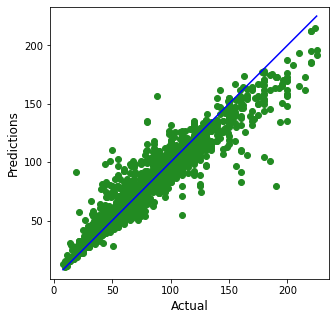

In [184]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, predictions_RF, c='forestgreen')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max( predictions_RF), max(y_test))
p2 = min(min( predictions_RF), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.axis('equal')
plt.show()

## Cross Validation Score

In [173]:
RFcross=cross_val_score(LinearRegression(),X,y)
print("cross_val_scores of LR: \n",RFcross)
print("LR cross val mean:\n",RFcross.mean())
print("LR cross val std:\n",RFcross.std())

cross_val_scores of LR: 
 [0.57836938 0.57383037 0.58803573 0.60463243 0.58652771]
LR cross val mean:
 0.5862791261187039
LR cross val std:
 0.010559611677538633


In [172]:
RFcross=cross_val_score(RandomForestRegressor(),X,y)
print("cross_val_scores of RF: \n",RFcross)
print("RF cross val mean:\n",RFcross.mean())
print("RF cross val std:\n",RFcross.std())

cross_val_scores of RF: 
 [0.59437891 0.57270156 0.57064286 0.61041523 0.5959403 ]
RF cross val mean:
 0.588815771518666
RF cross val std:
 0.015087523239613128


## Hyperparameter Tunning